In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

sns.set(style="darkgrid")
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [2]:
# showing the shape of the data 
print(df.shape)
print("columns: ", df.columns.tolist())
df.head()

(891, 12)
columns:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


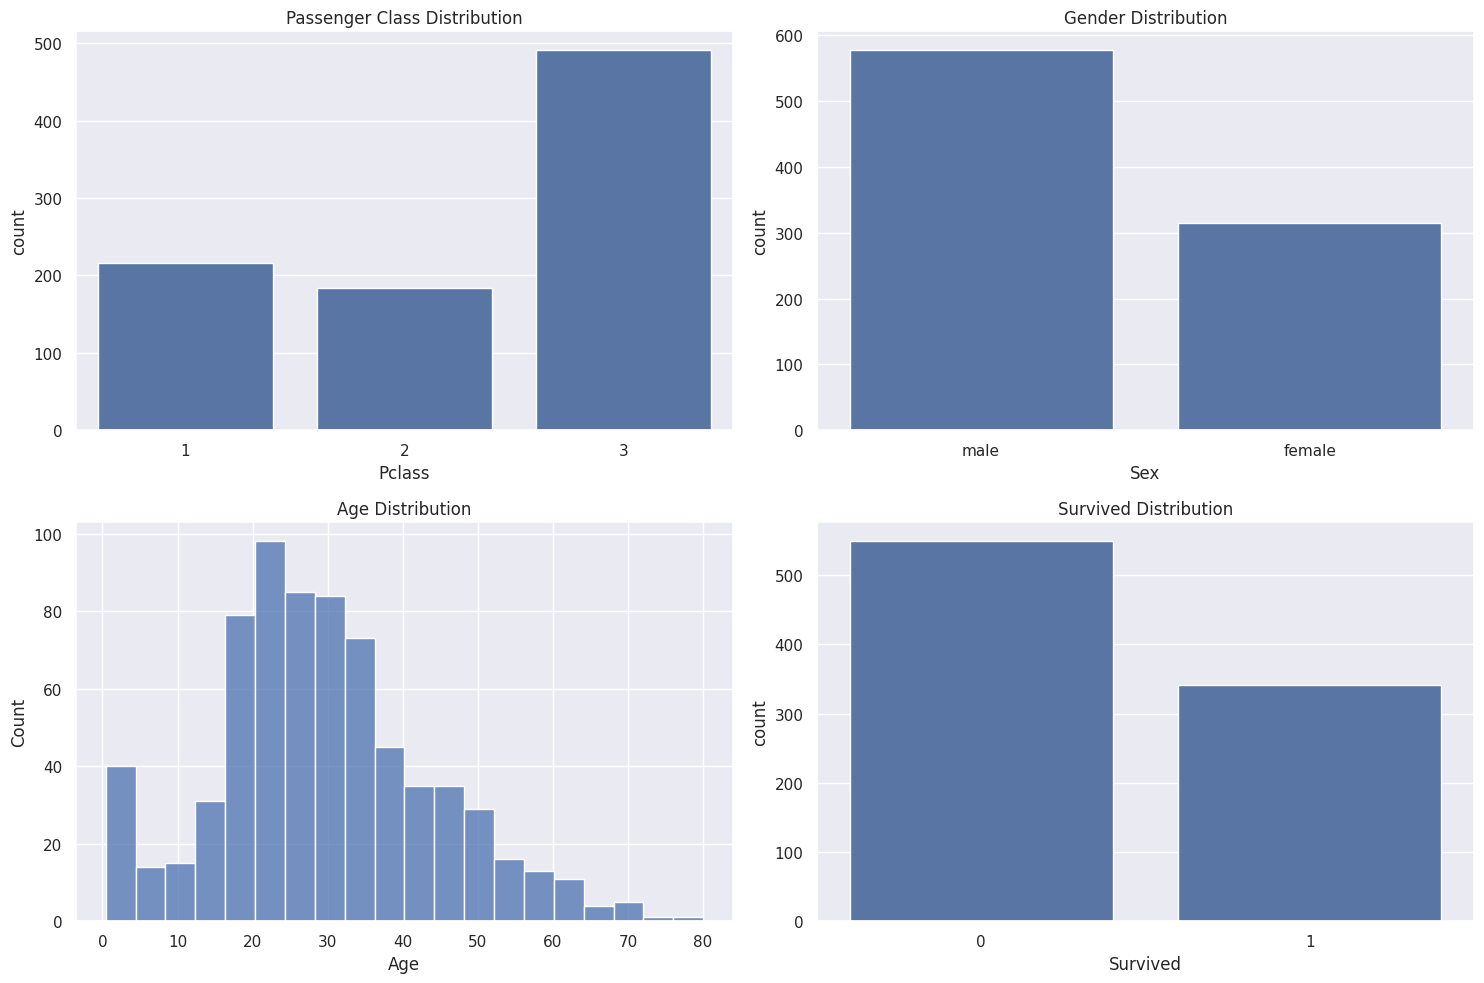

In [3]:
# lets visualize the dataset in a clean 2*2 layout
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# passenger class distribution
sns.countplot(x="Pclass", data=df, ax=ax[0][0])
ax[0][0].set_title("Passenger Class Distribution")
# gender distribution
sns.countplot(x="Sex", data=df, ax=ax[0][1])
ax[0][1].set_title("Gender Distribution")
# age distribution
sns.histplot(df["Age"], ax=ax[1][0])
ax[1][0].set_title("Age Distribution")
# survived distribution
sns.countplot(x="Survived", data=df, ax=ax[1][1])
ax[1][1].set_title("Survived Distribution")
plt.tight_layout()
plt.show()

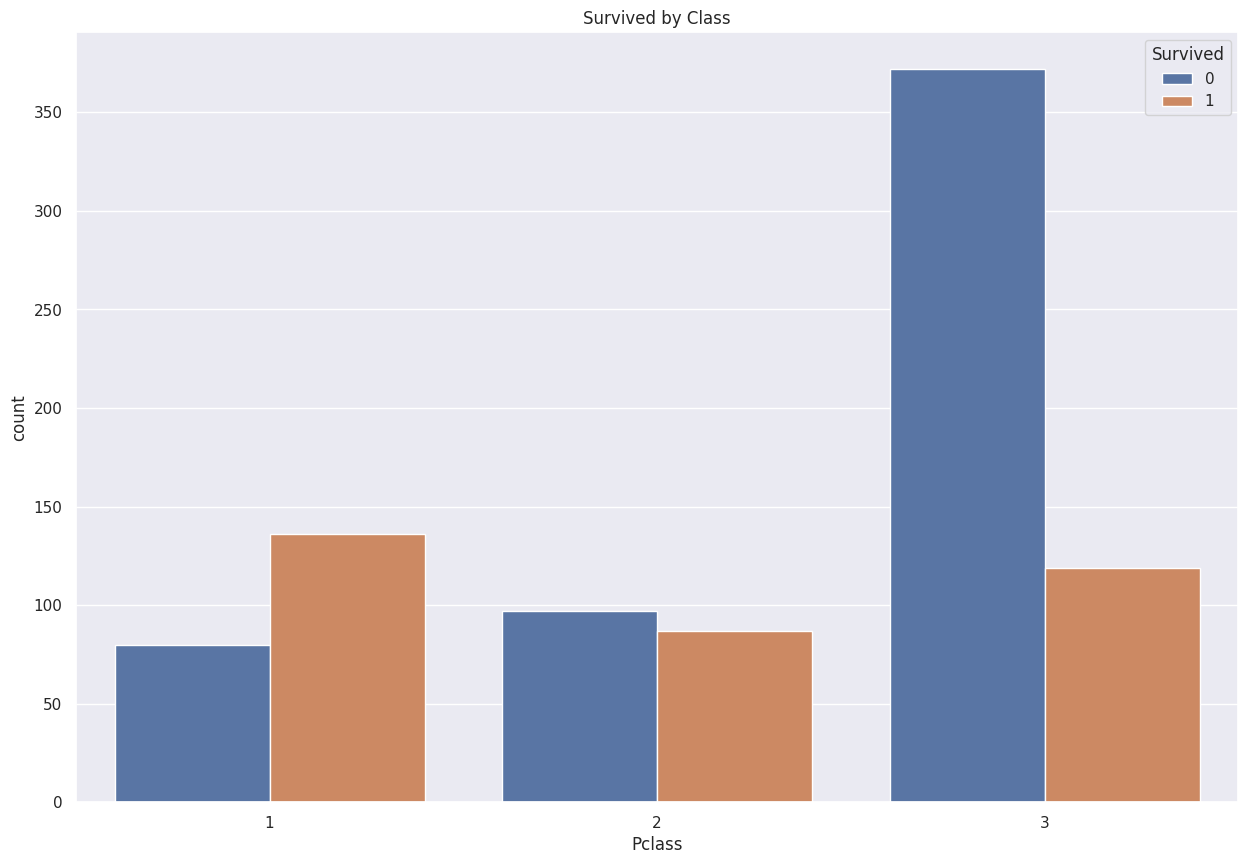

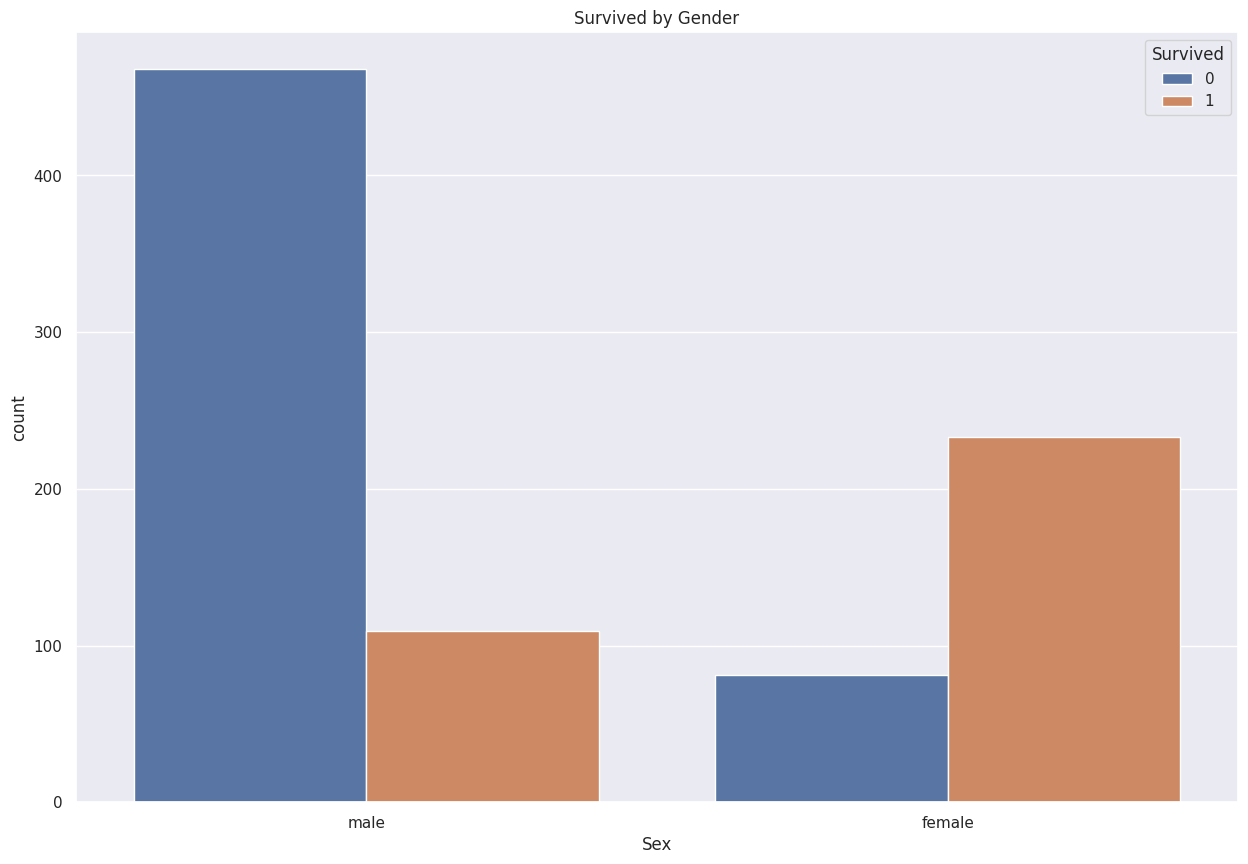

In [4]:
# lets examine relationship between variables
plt.figure(figsize=(15, 10))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survived by Class")
plt.show()
plt.figure(figsize=(15, 10))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survived by Gender")
plt.show()

In [10]:
# removing non-numeric data from the dataset
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [12]:
# converting 'sex' column to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

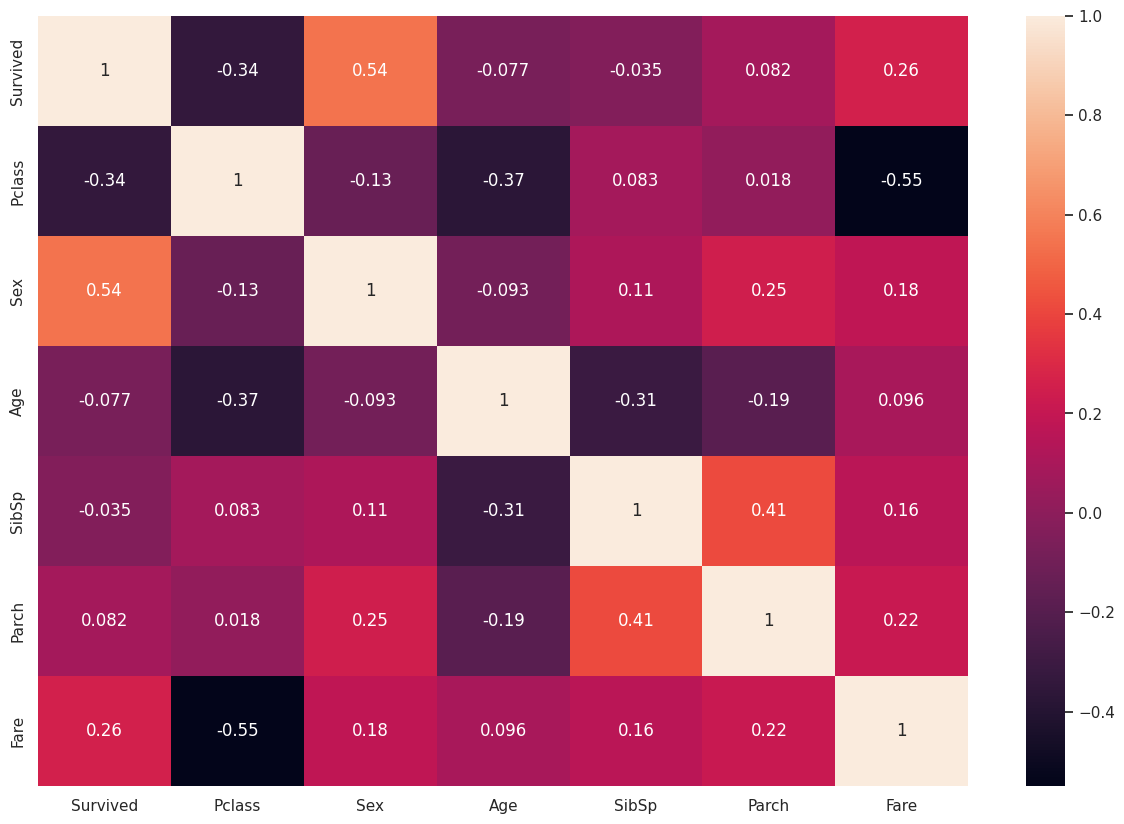

In [14]:
#showing the correlation of the dataset with fixing any non-numeric data in the dataset

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [7]:
# interactive visualization using plotly
fig = px.scatter(df, x="Age", y="Fare", color="Survived", size="Fare", hover_data=["Sex", "Pclass"],title="Interactive: Age vs Fare by Survived")

fig.show()

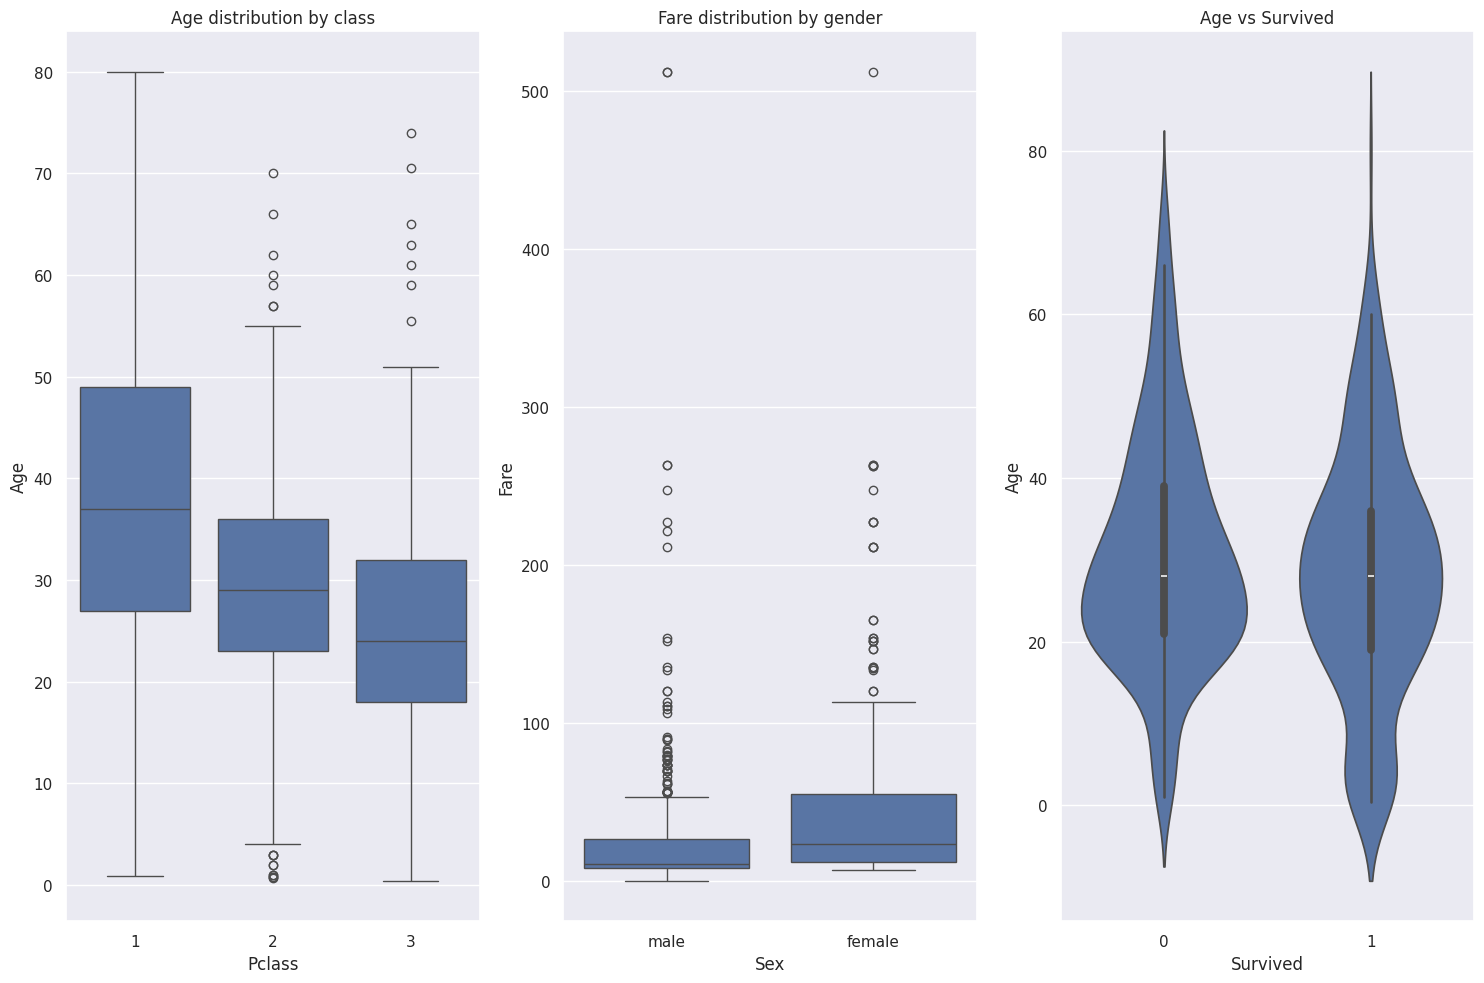

In [9]:
# combining with subplots(multiple seaborn and matplotlib charts into one figure)
fig, ax = plt.subplots(1,3, figsize=(15, 10))
# passenger class distribution
sns.boxplot(x="Pclass",y = "Age", data=df, ax=ax[0])
ax[0].set_title("Age distribution by class")
# gender distribution
sns.boxplot(x="Sex",y="Fare", data=df, ax=ax[1])
ax[1].set_title("Fare distribution by gender")
# age distribution
sns.violinplot(x ="Survived", y = "Age", data=df,ax = ax[2])
ax[2].set_title("Age vs Survived")
plt.tight_layout()
plt.show()